<a href="https://colab.research.google.com/github/abdulkerimosman/datascience/blob/main/question9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
auto = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Auto.csv')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [70]:
for i in auto.columns:
  auto[i] = auto[i].replace('?', np.nan)

auto['horsepower'].isna().sum()

5

In [71]:
auto = auto.dropna()
auto['horsepower'] = auto['horsepower'].astype(int)

<ipython-input-71-d90643d2d5c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto['horsepower'] = auto['horsepower'].astype(int)


In [72]:
auto['cylinders'] = auto['cylinders'].astype('category')
auto['year'] = auto['year'].astype('category')
auto['origin'] = auto['origin'].astype('category')

auto_quan = auto.drop(['cylinders','year','origin','name'], axis=1)

<ipython-input-72-cda5dd937126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto['cylinders'] = auto['cylinders'].astype('category')
<ipython-input-72-cda5dd937126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto['year'] = auto['year'].astype('category')
<ipython-input-72-cda5dd937126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [73]:
for i in auto_quan:
  print(f'Range of {i} is {np.max(auto[i]) - np.min(auto[i])}')

Range of mpg is 37.6
Range of displacement is 387.0
Range of horsepower is 184
Range of weight is 3527
Range of acceleration is 16.8


In [74]:
for i in auto_quan:
  print(f'Mean: {np.mean(auto_quan[i]):.2f}, Std: {np.std(auto_quan[i]):.2f}')

Mean: 23.45, Std: 7.80
Mean: 194.41, Std: 104.51
Mean: 104.47, Std: 38.44
Mean: 2977.58, Std: 848.32
Mean: 15.54, Std: 2.76


In [78]:
start_drop_index = 10
end_drop_index = min(start_drop_index + 76, len(auto_quan))

auto_quan.drop(index=auto_quan.index[start_drop_index:end_drop_index], inplace=True)

In [88]:
for i in auto_quan:
  print(f'Range of {i} is {np.max(auto[i]) - np.min(auto[i])}, Mean: {np.mean(auto_quan[i]):.2f}, Std: {np.std(auto_quan[i]):.2f}')


Range of mpg is 37.6, Mean: 24.41, Std: 7.85
Range of displacement is 387.0, Mean: 187.51, Std: 99.96
Range of horsepower is 184, Mean: 100.85, Std: 35.90
Range of weight is 3527, Mean: 2936.53, Std: 810.59
Range of acceleration is 16.8, Mean: 15.72, Std: 2.71


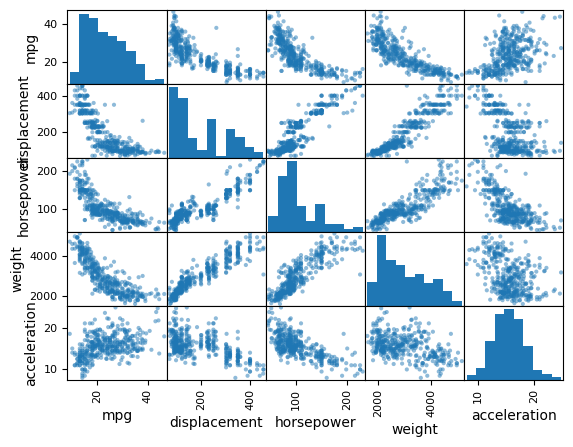

In [90]:
pd.plotting.scatter_matrix(auto);